# Regex Session

## Regex is a **sequence** of special **characters** that allows us to construct text patterns to search, match or extract data.
Using regular expressions you may extract from documents or webpages:
- names
- dates
- parts of urls
- entities
- numbers
- codes


In [55]:
re.search("^([A-Z][a-z]+lo)", "Hello Word")
# "Hello World"
# One capital letter followed by small letters 
# a space and one capital letter followed by small letters

<re.Match object; span=(0, 5), match='Hello'>

In [30]:
"07-01-1980"
# two letters, followed by a dash followed by two letters 
#and then a dash and then four letters

'07-01-1980'

### Types of characters
- Literal characters ***e.g. 't' will match in the string "the cat" the first and the last 't'.*** **OR the regex 'cat' will match the word 'cat'**

- Character class or set: When you place a character in sq. brackets it will match one of these characters. ***e.g. 'gr[ae]y' will match both the words gray and grey*** 

- Anchors: The tell the regular expression engine where to start looking for a match. 

>^: '^the' will match "the" from the string "the cat and the dog" because declares that the letter't' should be at the start of the string. 

>\$: means that the character preceding should be the last character in the string. 

>\b: the world boundary tells the enging that it should start the search at the start or the end of a word

- Special character: '.' matches any character. If you need to match an actual dot, then you add a backslash before it -> \\.

- Shorthand character e.g. \d is a shorthand for [0-9], \w is a shorthand for [A-Z] etc. (see below)

- Repetition qualifiers:

> \*: repeats the preceding character from **ZERO** to unlimited times

> +: repeats the preceding character from **ONE** to unlimited times

> ?: the previous character might exist or not. e.g. "cats?" will match cat and cats

> {minimum, maximum}: will repeat the previous character or set of characters from the minimum to the maximum. e.g. [0-9]{2,4} will match from two up to four numbers



>Have a look at the images below to understand what each character does.

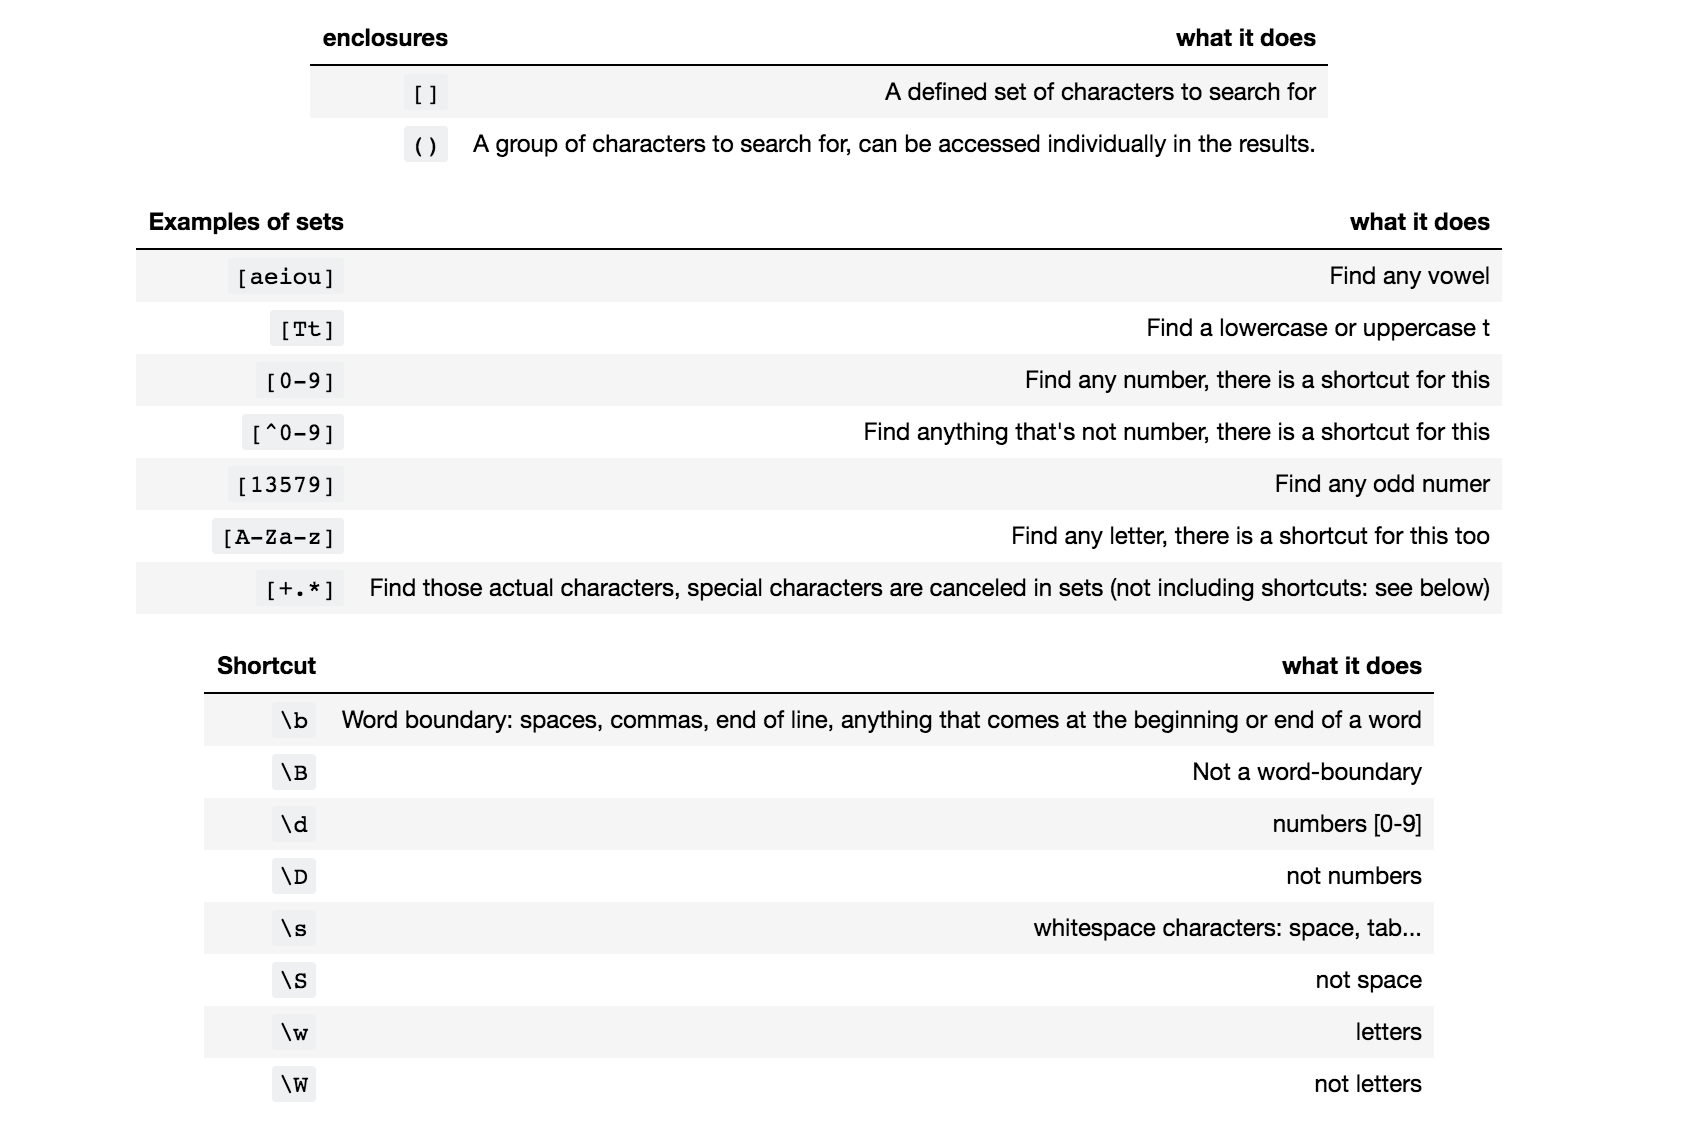

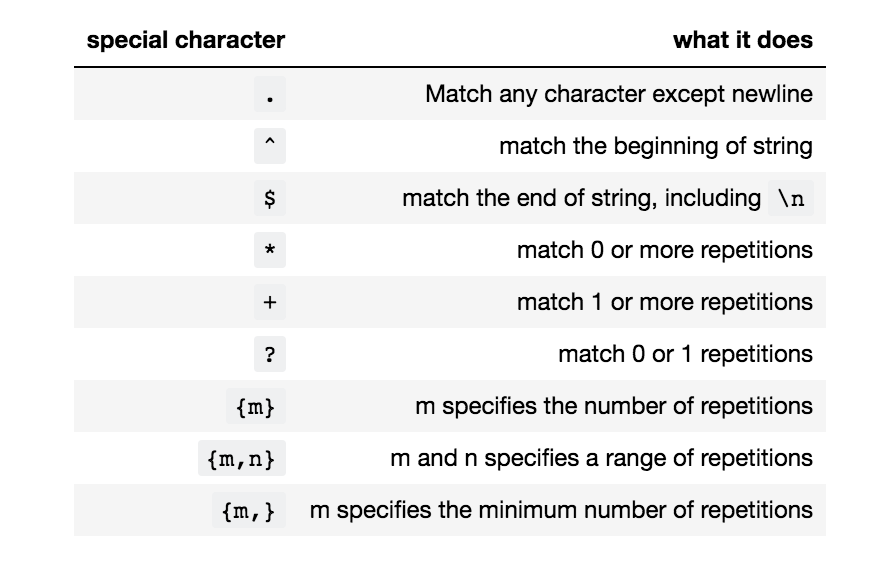

___
## Task 1: Extract a name from a string

We can use regular expressions in countless ways. In pandas dataframes, you use them usually like this:
***to extract information from a column***
> df["column"].str.extract(r'your regex goes here')

OR

***to filter your dataframe based on some text that exists in your df["column"]***
> df[df["column"].str.contains(r'your regex goes here', regex=True)]

OR
*** to find all matches***
> df["column"].str.findall(r"your regex goes here")

OR
*** split strings***
> df['name'].str.split()

In [56]:
# import pandas
import pandas as pd

In [57]:
# our test dataframe
df = pd.DataFrame([
    {"name": "Thanasis K. Troboukis", "phone number": "+30 6941556621", "birth": "01-07-1980"},
    {"name": "John J. Doe", "phone number": "+1 2334455995", "birth": "04-15-2003" }
])
df

,name,phone number,birth
0,Thanasis K. Troboukis,+30 6941556621,01-07-1980
1,John J. Doe,+1 2334455995,04-15-2003


In [58]:
# explain this regex in human words:
# ^ = Start from the beginning of the string
# \b = look for the start of the word
# [A-W][a-w]+ = find a capital letter that is followed by more than one (+) small letters
# \b = after the small letters, there should be a word boundary

# When enclose the regex that we want to extract in a parenthesis. 
# This is called --capture group. Whatever is in the capture group will be extracted

regex_first_name = r'^([A-Z][a-z]+)\b'

In [59]:
# Let's export the first name from the column "name" and save it in a column named "first_name"
df['name'].str.extract(regex_first_name)

,0
0,Thanasis
1,John


In [61]:
# Let's export the last name from the column "name" and save it in a column named "last_name"

regex_last_name = r'\s([A-Z][a-z]+)$'
# $ = at the end of the string

df['name'].str.extract(regex_last_name)

,0
0,Troboukis
1,Doe


In [62]:
# Let's export the middle name
regex_middle_name = r'\b([A-Z]\.?)\s'
# in human words: look for word boundary
# OUR CAPTURE GROUP:
# there should be a capital letter and a dot (or not a dot)
# then look for a white space 

## in this case, we won't use word boundary because our capture group ends with a dot. So the pattern won't work. 

In [63]:
df['middle_name'] = df['name'].str.extract(regex_middle_name)
df

,name,phone number,birth,middle_name
0,Thanasis K. Troboukis,+30 6941556621,01-07-1980,K.
1,John J. Doe,+1 2334455995,04-15-2003,J.


### The magic of str.split()

In [8]:
#Splits name in white spaces and then gets the first item of the splited str.
df['split_name'] = df['name'].str.split().str[0]

In [9]:
df

,name,phone number,birth,middle_name,split_name
0,Thanasis K. Troboukis,+30 6941556621,01-07-1980,K.,Thanasis
1,John J. Doe,+1 2334455995,04-15-2003,J.,John


In [10]:
df['name'].str.split().str[1]

0    K.
1    J.
Name: name, dtype: object

In [11]:
df['name'].str.split().str[2]

0    Troboukis
1          Doe
Name: name, dtype: object

In [70]:
# This will bring everything
df['name'].str.extract(r"(.*)")

,0
0,Thanasis K. Troboukis
1,John J. Doe


In [72]:
# This will bring everything until it finds a dot
df['name'].str.extract(r"(.*?)\.")

,0
0,Thanasis K
1,John J


____
## Practise

1. Extract the year of the date of birth
2. Extract the area code of the phone number

In [73]:
date = '01-07-1980'

In [76]:
re.search('-([0-9]{4})', date).group(1)

'1980'

In [77]:
phone = '+30 210 8835749'

In [89]:
re.search("\s(\d{3})\s", phone).group(1)

'210'

# Extra functions

- re.search(regex, str, flags) => searches for matches in the string
- re.match(regex, str, flags) => it looks for a match at the beginning of the string. If you need to find a match anywhere in the string, use re.search()
- re.findall(regex, str, flags) => finds all instances of the patern and returns a list
- re.sub((regex, 'replacer', str, flags) => finds a match a replaces it with the replacer

In [90]:
# We need to import the regex library
import re

In [15]:
string = 'My name is Thanasis Troboukis and I was born in Athens in 1980'

In [94]:
# extracting name
re.search(r'\s([A-Z][a-z]+)\s', string).group(1)

'Thanasis'

In [17]:
# extracting all words with first capital letter
re.findall(r'\s([A-Z][a-z]+)', string)

['Thanasis', 'Troboukis', 'Athens']

In [95]:
# extracting all numbers
re.search(r'\s([0-9]+)$', string).group(1)

'1980'

In [19]:
string

'My name is Thanasis Troboukis and I was born in Athens in 1980'

In [96]:
# changing the year from 1980 to 2000
re.sub(r'\b(\d{4})\b', "2000", string)

'My name is Thanasis Troboukis and I was born in Athens in 2000'

# Extracting from URL

In [21]:
# We want to get the characters after gov.gr/ up to the last /, but not the last /
url = 'https://eody.gov.gr/covid-gr-daily-report-20210711/'

In [97]:
# capture everything after .gr/ up to the final/ at the end of the line
# we use .group(1) to get the match. .group(0) has the whole match independently of the capture groups
re.search(r"gr/([a-z\-\d]+)/", url).group(1)

'covid-gr-daily-report-20210711'

In [101]:
# lets get two capture groups - one with the description of the file and one with the date
re.search(r'.*?\.gr/(.*?)(\d+)/$', url).group(2)

'20210711'

In [24]:
re.search(r'.*?\.gr\/(.*?)(\d+)/$', url).group(1)

'covid-gr-daily-report-'

In [25]:
re.search(r'.*?\.gr\/(.*?)(\d+)/$', url).group(2)

'20210711'

In [102]:
url

'https://eody.gov.gr/covid-gr-daily-report-20210711/'

In [107]:
# Lets say that for some reason we want to change the structure of the url
re.sub(r'(.*?\.gr\/)(.*?)(\d+)/$', r"\3-\2\1", url)

'20210711-covid-gr-daily-report-https://eody.gov.gr/'

### Lookahead - lookbehind

In [147]:
words = ['bear', 'gear', 'tear', 'dear' ]

In [149]:
# Bring us the words that DON'T start with b
for word in words:
    try:
        print(re.search(r"\b(?!b)(\w+)\b", word).group(1))
    except AttributeError as e:
        print(e)

'NoneType' object has no attribute 'group'
gear
tear
dear


In [148]:
# Bring us the words that start with t
for word in words:
    try:
        print(re.search(r"\b(?=t)(\w+)\b", word).group(1))
    except AttributeError as e:
        print(e)

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
tear
'NoneType' object has no attribute 'group'


# Use re in pandas - lambda function

In [109]:
df['new_name'] = df.name.apply(lambda x: re.search(r'([A-Z][a-z]+)\b',x).group(1))

In [110]:
df

,name,phone number,birth,middle_name,new_name
0,Thanasis K. Troboukis,+30 6941556621,01-07-1980,K.,Thanasis
1,John J. Doe,+1 2334455995,04-15-2003,J.,John


# To read list:
> [lookahead and lookbehind](https://www.regular-expressions.info/lookaround.html)

> [capturing and non capturing groups](https://www.regular-expressions.info/brackets.html)

>This ugly website is the best out there to understand what you can do with Regex.
https://www.regular-expressions.info/tutorial.html

> You can test your regex using this very helpful web app
https://regex101.com/
___